# 任务3 会员用户画像

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 读取预处理后的会员信息表与销售流水表的合并表
whole = pd.read_csv('temp/task1.csv')

/home/linux/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(whole)

1971598

In [4]:
whole.head()

,kh,csrq,xb,djsj,dtime,spbm,sl,sj,je,spmc,jf,syjh,djh,gzbm,gzmc
0,c68b20b4,2002-11-02,0.0,2013-05-11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,2016-09-25 10:49:14.016,d62a69e3,1.0,499.0,297.07,WMF D无,297.08,101.0,7cd8,7296.0,WMF 柜
2,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,2016-09-25 10:49:14.016,d62a69e3,1.0,12288.0,11089.93,WMF D无,11089.92,101.0,7cd8,7296.0,WMF 柜
3,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,2017-02-28 17:17:35.533,252403ef,1.0,598.0,598.00,双立人商品 F无,598.00,102.0,ed0a,7242.0,双立人柜
4,2ab88539,1982-06-01,0.0,2010-11-19 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
whole.isnull().sum()

kh        997636
csrq     1455712
xb       1455712
djsj     1455712
dtime     104950
spbm      104950
sl        104950
sj        104950
je        104950
spmc      104950
jf       1102586
syjh      104950
djh       104950
gzbm     1102586
gzmc     1121901
dtype: int64

In [6]:
# 去除非会员订单，以及无购买记录的会员记录
whole2 = whole.dropna(axis = 0,subset = ['kh','djsj','dtime'])

In [7]:
whole2.isnull().sum()

kh          0
csrq        0
xb          0
djsj        0
dtime       0
spbm        0
sl          0
sj          0
je          0
spmc        0
jf          0
syjh        0
djh         0
gzbm        0
gzmc     6827
dtype: int64

In [8]:
len(whole2)

410936

In [9]:
khs = list(set(whole2['kh']))

In [10]:
len(khs)

31361

In [11]:
# 将日期转换为datetime格式
whole2['dtime'] = pd.to_datetime(whole2['dtime'])
whole2['csrq'] = pd.to_datetime(whole2['csrq'])
whole2['djsj'] = pd.to_datetime(whole2['djsj'])

/home/linux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/linux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/linux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [12]:
def get_gwjj(x):
    if x.month in [3,4,5]:
        return '春季'
    elif x.month in [6,7,8]:
        return '夏季'
    elif x.month in [9,10,11]:
        return '秋季'
    else:
        return '冬季'

def get_rhsc(x):
    return (pd.to_datetime('2018-1-5') - x).days

In [13]:
# 计算会员年龄
whole2['nl'] = whole2['csrq'].apply(lambda x:2018 - x.year)
# 计算购物季节
whole2['jj'] = whole2['dtime'].apply(lambda x:get_gwjj(x))
# 计算入会时长
whole2['rhsc'] = whole2['djsj'].apply(lambda x:get_rhsc(x))

/home/linux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/linux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/linux/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [14]:
whole2.head()

,kh,csrq,xb,djsj,dtime,spbm,sl,sj,je,spmc,jf,syjh,djh,gzbm,gzmc,nl,jj,rhsc
1,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,2016-09-25 10:49:14.016,d62a69e3,1.0,499.0,297.07,WMF D无,297.08,101.0,7cd8,7296.0,WMF 柜,51,秋季,4752
2,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,2016-09-25 10:49:14.016,d62a69e3,1.0,12288.0,11089.93,WMF D无,11089.92,101.0,7cd8,7296.0,WMF 柜,51,秋季,4752
3,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216,2017-02-28 17:17:35.533,252403ef,1.0,598.0,598.00,双立人商品 F无,598.00,102.0,ed0a,7242.0,双立人柜,51,冬季,4752
7,34c2dc93,1986-07-18,0.0,2007-04-19 00:00:00.000,2017-11-13 13:36:45.656,4708e0bb,1.0,260.0,260.00,植村秀三色眼影/眼线液/眉笔.,260.00,97.0,c3f4,8156.0,Shu Uemura,32,秋季,3914
10,828aa9b4,1951-12-29,0.0,2004-09-24 16:39:08.716,2017-05-17 11:30:39.080,a4809307,1.0,1288.0,1288.00,酷彩F件,1288.00,102.0,95b0,7300.0,Le Creuset(酷彩),67,春季,4850


In [15]:
gzmc = whole2['gzmc']

In [16]:
len(gzmc)

410936

In [17]:
gzmc2 = set(gzmc.values)

In [18]:
gzmc3 = list(gzmc2)

In [19]:
len(gzmc3)

814

In [23]:
def get_lab(kh):
    order = whole2[whole2['kh'] == kh]
    
    # 基本特征标签
    xb = order.iloc[0]['xb'] # 性别
    if xb == 0.0:
        xb = '女'
    elif xb == 1.0:
        xb = '男'
    rhsc = order.iloc[0]['rhsc'] #入会时长（天）
    nl = order.iloc[0]['nl'] # 年龄
    
    # 业务特征标签
    jf = np.sum(order['jf']) # 积分
    xfsp = np.sum(order['je']) # 消费水平
    xfpc = len(set(order['dtime'].apply(lambda x:(x.year,x.month,x.day,x.hour)))) # 消费频次
    
    # 兴趣特征标签
    # 提取购物偏好特征，设定为用户购买物品的柜组名称最高频的3个
    gzmc = order['gzmc']
    gzmc_pc = gzmc.value_counts()
    if len(gzmc_pc) > 3:
        gzmc_lab = list(gzmc_pc.index[:3])
    else:
        gzmc_lab = list(gzmc_pc.index)

    
    jj = list(set(order['jj'].values)) # 季节偏好,选取最高频的购物季节
    gwjj_list = list(order['jj'].values)
    jjph = jj[0]
    jjcs = gwjj_list.count(jjph)
    for i in jj:
        if gwjj_list.count(i) > jjcs:
            jjph = i
            jjcs = gwjj_list.count(i)
    
    
    return xb,rhsc,nl,jf,xfsp,gzmc_lab,jjph,xfpc

In [24]:
get_lab(khs[107])

('女', 2385, 27, 890.0, 890.0, ['作品（特卖）柜'], '春季', 1)

In [25]:
xbs = []
rhscs = []
nls = []
jfs = []
xfsps = []
gzmc_labs = []
jjphs = []
xfpcs = []

for kh in khs:
    xb,rhsc,nl,jf,xfsp,gzmc_lab,jjph,xfpc = get_lab(kh)
    xbs.append(xb)
    rhscs.append(rhsc)
    nls.append(nl)
    jfs.append(jf)
    xfsps.append(xfsp)
    gzmc_labs.append(gzmc_lab)
    jjphs.append(jjph)
    xfpcs.append(xfpc)

In [26]:
labels = pd.DataFrame()
labels['kh'] = khs
labels['xb'] = xbs
labels['rhsc'] = rhscs
labels['nl'] = nls
labels['jf'] = jfs
labels['xfsp'] = xfsps
labels['gwspph'] = gzmc_labs
labels['jjph'] = jjphs
labels['xfpc'] = xfpcs

In [27]:
labels.head()

,kh,xb,rhsc,nl,jf,xfsp,gwspph,jjph,xfpc
0,8c8011fa,女,2096,44,4946.00,4946.00,"[科颜氏柜, 沙驰男装柜]",冬季,2
1,df5c408a,女,2871,35,3578.00,3578.00,"[BIOTHERM, Fancl柜]",春季,2
2,e2471fe6,女,1412,23,24062.62,25174.00,"[BIOTHERM, LANCOME, 科颜氏(Kiehl's)]",夏季,25
3,c68d6c18,女,53,29,4134.00,6802.02,"[APM, DKNY 柜, ladanum&myteno]",秋季,4
4,2786b582,女,1752,56,1170.00,1170.00,[兰芝柜],春季,1


In [28]:
labels.describe()

,rhsc,nl,jf,xfsp,xfpc
count,31361.000000,31361.000000,3.136100e+04,3.136100e+04,31361.000000
mean,1679.229170,41.307484,1.414130e+04,1.844931e+04,5.659577
std,1167.199552,10.118743,3.784904e+04,5.213320e+04,10.064520
min,1.000000,8.000000,0.000000e+00,0.000000e+00,1.000000
25%,861.000000,33.000000,1.320000e+03,1.865000e+03,1.000000
50%,1415.000000,41.000000,4.000000e+03,5.263000e+03,2.000000
75%,2466.000000,48.000000,1.181400e+04,1.559840e+04,6.000000
max,5552.000000,97.000000,1.413370e+06,3.281898e+06,223.000000


In [29]:
labels.to_csv('temp/label.csv')

In [ ]:
labels = pd.read_csv('label.csv')

In [89]:
# 可视化标签
def visual_lab(kh):    
    import wordcloud
    import PIL.Image as image
    info = labels[labels['kh'] == kh].values[0][1:]
    text = [str(i) for i in info[:5]]
    for i in eval(str(info[5])):
        text.append(i)
    for i in info[6:]:
        text.append(str(i))
    
    text[0] += '性'
    text[1] = '入会' + str(text[1]) + '天'
    text[2] += '岁'
    text[3] = str(int(eval(text[3]))) + '分'
    text[4] = str(int(eval(text[4]))) + '元'
    text[-1] = '消费' + str(text[-1]) + '次'

    print_text = ''
    for i in text:
        print_text += i
        print_text += ' '

    if info[0] == '男':
        mask = np.array(image.open("male.png"))
    elif info[0] == '女':
        mask = np.array(image.open("female.png"))

    wc = wordcloud.WordCloud(scale = 16,mask=mask,background_color='white',colormap="coolwarm")
    X = wc.generate(str(print_text))
    plt.figure(figsize = (8,8))
    plt.axis('off')
    plt.imshow(X)



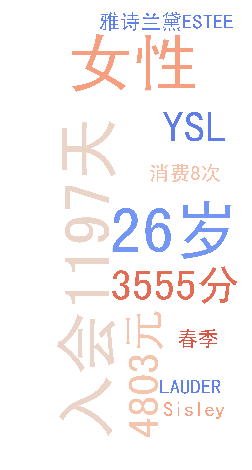

In [93]:
# 举例
visual_lab(khs[68])